# CNN For Emnist & Symbol Images

In [1]:
pip install python-mnist

Note: you may need to restart the kernel to use updated packages.


## Loading Emnist data

In [2]:
import tensorflow as tf


import numpy as np
from mnist.loader import MNIST

mndata = MNIST('data')
#This will load the train and test data
X_train, y_train = mndata.load('/kaggle/input/emnist/emnist_source_files/emnist-balanced-train-images-idx3-ubyte',
                               '/kaggle/input/emnist/emnist_source_files/emnist-balanced-train-labels-idx1-ubyte')
X_test, y_test = mndata.load('/kaggle/input/emnist/emnist_source_files/emnist-balanced-test-images-idx3-ubyte',
                             '/kaggle/input/emnist/emnist_source_files/emnist-balanced-test-labels-idx1-ubyte')

# Convert data to numpy arrays and normalize images to the interval [0, 1]
X_train = np.array(X_train) / 255.0
y_train = np.array(y_train)
X_test = np.array(X_test) / 255.0
y_test = np.array(y_test)

2024-03-15 10:23:47.319279: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 10:23:47.319384: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 10:23:47.446357: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Reshaping data

In [3]:
#Reshaping all images into 28*28 for pre-processing
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

In [4]:
X_train

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [5]:
y_train.tolist()

[45,
 36,
 43,
 15,
 4,
 42,
 26,
 32,
 20,
 1,
 46,
 43,
 15,
 13,
 24,
 12,
 5,
 17,
 3,
 40,
 42,
 14,
 14,
 44,
 32,
 3,
 19,
 42,
 29,
 40,
 17,
 25,
 3,
 35,
 20,
 35,
 26,
 17,
 46,
 28,
 25,
 32,
 23,
 22,
 34,
 9,
 46,
 19,
 30,
 38,
 20,
 20,
 15,
 32,
 40,
 34,
 36,
 34,
 39,
 38,
 37,
 20,
 31,
 16,
 16,
 44,
 7,
 2,
 46,
 32,
 38,
 43,
 13,
 8,
 26,
 34,
 44,
 28,
 4,
 10,
 6,
 27,
 25,
 3,
 43,
 10,
 27,
 35,
 38,
 4,
 24,
 7,
 13,
 5,
 45,
 17,
 20,
 23,
 44,
 31,
 33,
 42,
 5,
 38,
 30,
 45,
 38,
 34,
 40,
 45,
 10,
 8,
 11,
 10,
 11,
 7,
 12,
 15,
 4,
 35,
 20,
 25,
 35,
 10,
 5,
 18,
 31,
 19,
 19,
 7,
 2,
 37,
 41,
 20,
 26,
 4,
 43,
 19,
 31,
 26,
 33,
 4,
 31,
 30,
 11,
 6,
 32,
 30,
 24,
 10,
 27,
 2,
 36,
 14,
 24,
 46,
 0,
 35,
 12,
 14,
 0,
 32,
 40,
 25,
 13,
 45,
 8,
 18,
 0,
 12,
 33,
 46,
 43,
 12,
 38,
 11,
 2,
 9,
 3,
 12,
 17,
 5,
 9,
 9,
 39,
 36,
 3,
 38,
 21,
 19,
 28,
 30,
 8,
 20,
 39,
 8,
 15,
 24,
 7,
 27,
 39,
 8,
 16,
 33,
 36,
 36,
 12,
 3,
 29

### Data Viz

<function matplotlib.pyplot.show(close=None, block=None)>

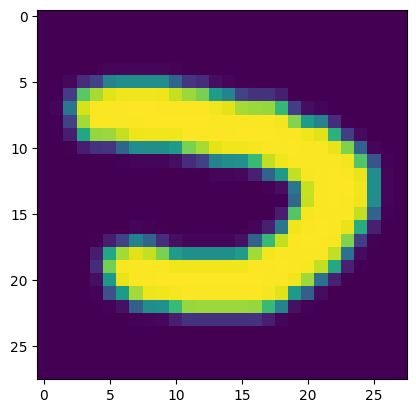

In [6]:
from matplotlib import pyplot as plt
#Display a random image
plt.imshow(X_train[2000])
plt.show

In [7]:
#Y'all can see how an image array looks like. all float values b/w 0 and 1
m = X_train[2]
print(m)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.01568627 0.01568627
  0.01176471 0.01176471 0.01176471 0.01568627 0.01568627 0.01568627
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.00784314 0.03529412 0.1254902  0.14509804 0.14509804 0.14509804
  0.14509804 0.14509804 0.14509804 0.2        0.44705882 0.49019608
  0.37254902 0.40784314 0.37254902 0.49019608 0.49803922 0.44705882
  0.17647059 0.01960784 0.         0.        ]
 [0.         0.         0.         0.         0.01568627 0.08627451
  0.32156863 0.54509804 0.8    

In [8]:
X_train.shape

(112800, 28, 28)

In [9]:
X_test.shape

(18800, 28, 28)

Process Complete: Rotated and reversed test and train images!


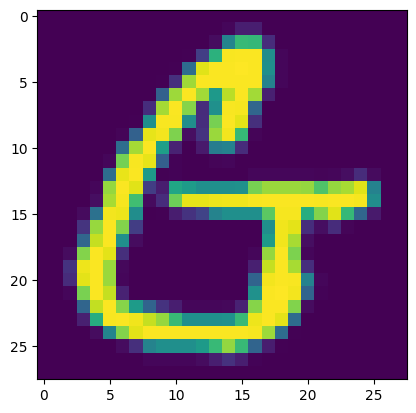

In [10]:
#for train data
for t in range(112800):
    X_train[t]=np.transpose(X_train[t])
    
#checking
plt.imshow(X_train[0])
plt.show

#for test data  
for t in range(18800):
    X_test[t]=np.transpose(X_test[t])

#checking
plt.imshow(X_test[10])
plt.show

print('Process Complete: Rotated and reversed test and train images!')

<function matplotlib.pyplot.show(close=None, block=None)>

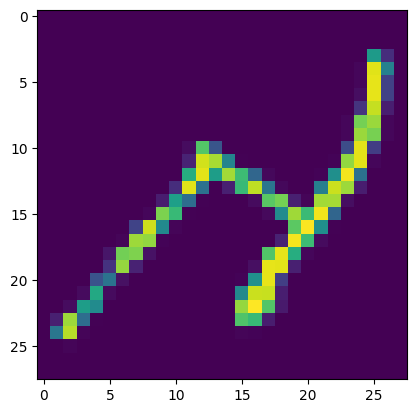

In [11]:
plt.imshow(X_test[100])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

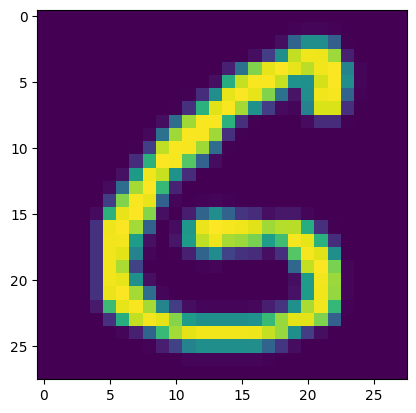

In [12]:
m = X_train[100000]
plt.imshow(m)
plt.show

### Data Reshaping

In [13]:
X_train = X_train.reshape(X_train.shape[0], 784,1)
X_test = X_test.reshape(X_test.shape[0], 784,1)

In [14]:
X_train.shape

(112800, 784, 1)

In [15]:
X_test.shape

(18800, 784, 1)

In [16]:
X_train.dtype

dtype('float64')

In [17]:
X_test.dtype

dtype('float64')

In [18]:
y_train.dtype

dtype('uint8')

In [19]:
y_test.dtype

dtype('uint8')

In [20]:
y_train.shape

(112800,)

In [21]:
y_test.shape

(18800,)

## Data Loading of Math Symbol Image Data

In [22]:
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split

# Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(np.array(img))
    return images

# Function to preprocess images (resize, normalize, etc.)
def preprocess_images(images):
    processed_images = [resize_and_normalize(Image.fromarray(img.copy())) for img in images]
    return processed_images

# Function to resize and normalize images
def resize_and_normalize(img):
    img = img.resize((28, 28))  # Resize images to 28x28
    img = np.array(img) / 255.0  # Normalize pixel values
    return img

# Load images from each class folder
data = []
labels = []
class_folders = ['=', '-', '+', '(', ')', '�']
for i, folder in enumerate(class_folders):
    images = load_images_from_folder(os.path.join('/kaggle/input/math-symbol/images', folder))
    processed_images = preprocess_images(images)
    data.extend(processed_images)
    labels.extend([i+47] * len(processed_images))  # Assign label for each class

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Split data into train and test sets
X_train_img, X_test_img, y_train_img, y_test_img = train_test_split(data, labels, test_size=0.2, random_state=42)



In [23]:
X_train_img[0]

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99607843, 0.99607843,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.85490196, 0.3254902 , 0.9372549 , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        0.99215686, 0.89019608, 0.46666667, 0.91372549, 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.    

### Data Viz

In [24]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

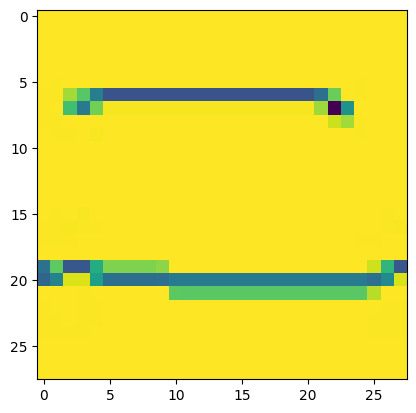

In [25]:
m = X_train_img[40000]
plt.imshow(m)
plt.show


In [26]:
y_train_img.tolist()

[49,
 50,
 48,
 49,
 50,
 51,
 48,
 48,
 49,
 49,
 51,
 49,
 48,
 49,
 49,
 49,
 50,
 48,
 50,
 49,
 48,
 50,
 49,
 51,
 51,
 48,
 50,
 48,
 47,
 47,
 48,
 49,
 49,
 48,
 48,
 48,
 48,
 49,
 48,
 50,
 51,
 47,
 47,
 51,
 48,
 50,
 49,
 48,
 48,
 48,
 47,
 49,
 49,
 49,
 48,
 50,
 47,
 51,
 47,
 51,
 50,
 49,
 51,
 48,
 52,
 49,
 51,
 48,
 51,
 49,
 51,
 48,
 52,
 51,
 47,
 48,
 49,
 48,
 50,
 49,
 48,
 50,
 49,
 47,
 49,
 48,
 50,
 48,
 48,
 49,
 49,
 49,
 49,
 47,
 48,
 48,
 48,
 48,
 49,
 49,
 48,
 48,
 51,
 51,
 48,
 50,
 47,
 49,
 49,
 48,
 49,
 47,
 48,
 47,
 51,
 50,
 48,
 49,
 49,
 48,
 48,
 51,
 49,
 48,
 48,
 49,
 48,
 47,
 51,
 51,
 48,
 49,
 51,
 49,
 51,
 49,
 48,
 48,
 48,
 48,
 49,
 50,
 47,
 51,
 51,
 50,
 48,
 50,
 48,
 51,
 49,
 47,
 48,
 48,
 49,
 50,
 49,
 49,
 48,
 50,
 49,
 48,
 48,
 50,
 49,
 49,
 50,
 51,
 47,
 48,
 49,
 50,
 48,
 47,
 51,
 48,
 48,
 48,
 48,
 49,
 48,
 50,
 49,
 47,
 48,
 47,
 48,
 48,
 49,
 48,
 48,
 47,
 50,
 48,
 48,
 49,
 51,
 51,
 47,
 51,


## Data Reshaping and Merging Data

In [27]:
y_train.size

112800

In [28]:
y_train_img.size

81384

In [29]:
y_t = np.concatenate((y_train,y_train_img),axis=0)

In [30]:
y_t.size

194184

In [31]:
X_train[0].size

784

In [32]:
X_train_img[0].size

784

In [33]:
X_train.shape

(112800, 784, 1)

In [34]:
X_train_img.shape

(81384, 28, 28)

In [35]:
x_r = X_train_img.reshape((81384,784,1))

In [36]:
x_r.shape

(81384, 784, 1)

In [37]:
X_train.shape

(112800, 784, 1)

In [38]:
x_t = np.concatenate((X_train,x_r),axis=0)

In [39]:
x_t.shape

(194184, 784, 1)

In [40]:
X_test_img.shape

(20346, 28, 28)

In [41]:
x_test = X_test_img.reshape((20346,784,1))

In [42]:
x_test.shape

(20346, 784, 1)

In [43]:
X_test.shape

(18800, 784, 1)

In [44]:
X_test = np.concatenate((X_test,x_test),axis=0)

In [45]:
X_test.shape

(39146, 784, 1)

In [46]:
y_test.shape

(18800,)

In [47]:
y_test_img.shape

(20346,)

In [48]:
y_test = np.concatenate((y_test,y_test_img),axis=0)

In [49]:
y_test.shape

(39146,)

In [50]:
X_train = x_t

In [51]:
y_train = y_t

## Modeling

In [52]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, LSTM
from keras import utils

from keras.constraints import max_norm
def resh(ipar):
    opar = []
    for image in ipar:
        opar.append(image.reshape(-1))
    return np.asarray(opar)


train_images = X_train.astype('float32')
test_images = X_test.astype('float32')

train_images = resh(train_images)
test_images = resh(test_images)


train_labels = utils.to_categorical(y_train, 53)
test_labels = utils.to_categorical(y_test, 53)



model = Sequential()

model.add(Reshape((28,28,1), input_shape=(784,)))

#add the layer below for an accuracy of 89%.(Training time - over 20 hours)
model.add(Convolution2D(32, (5,5), input_shape=(28,28,1),
                             activation='relu',padding='same',
                            kernel_constraint=max_norm(3)))
model.add(Convolution2D(32, (5,5),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))







model.add(Flatten())




model.add(Dense(1024, activation='relu', kernel_constraint=max_norm(3)))
model.add(Dense(512, activation='relu', kernel_constraint=max_norm(3)))



model.add(Dropout(0.5))

model.add(Dense(53, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [53]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 53)             │        27,189 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,298,069 (20.21 MB)

 Trainable params: 5,298,069 (20.21 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
history = model.fit(train_images,train_labels,validation_data=(test_images, test_labels), batch_size=64, epochs=50)


Epoch 1/50
  42/3035 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9844 - loss: 0.0513 

W0000 00:00:1710499732.447529     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


3026/3035 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9685 - loss: 0.0956

W0000 00:00:1710499744.485613     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


3035/3035 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9685 - loss: 0.0956 - val_accuracy: 0.9294 - val_loss: 0.2406
Epoch 2/50
  43/3035 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9738 - loss: 0.0829

W0000 00:00:1710499745.996017     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


3035/3035 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9695 - loss: 0.0883 - val_accuracy: 0.9294 - val_loss: 0.2562
Epoch 3/50
3035/3035 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9703 - loss: 0.0873 - val_accuracy: 0.9313 - val_loss: 0.2519
Epoch 4/50
3035/3035 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9700 - loss: 0.0863 - val_accuracy: 0.9312 - val_loss: 0.2434
Epoch 5/50
3035/3035 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9697 - loss: 0.0874 - val_accuracy: 0.9288 - val_loss: 0.2667
Epoch 6/50
3035/3035 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9708 - loss: 0.0859 - val_accuracy: 0.9311 - val_loss: 0.2453
Epoch 7/50
3035/3035 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9712 - loss: 0.0854 - val_accuracy: 0.9294 - val_loss: 0.2515
Epoch 8/50
3035/3035 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9713 - loss: 0.0856 - val_accuracy: 0.9300 - val_loss: 0.2502
Epoch 9/50
3035/3035 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9712 - loss: 0.0859 - val

In [59]:
#evaluating model on test data. will take time
scores = model.evaluate(test_images,test_labels, verbose = 0)
print("Accuracy: %.2f%%"%(scores[1]*100))

Accuracy: 92.45%


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


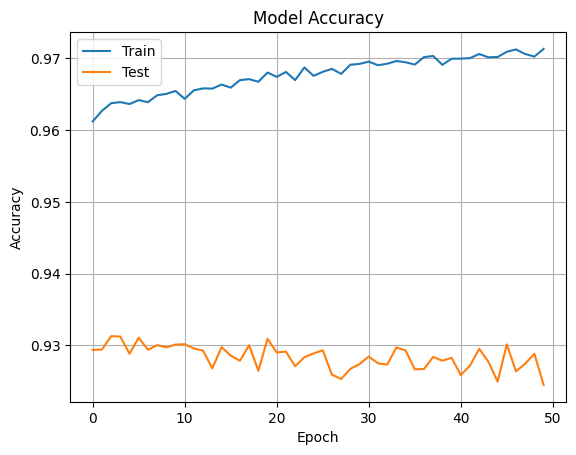

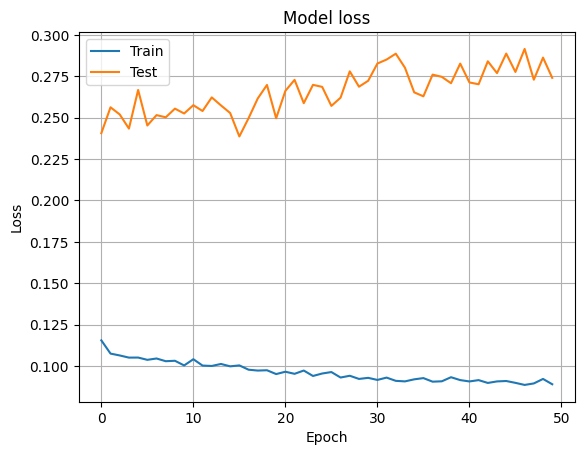

In [60]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()

In [66]:
from keras.models import load_model
from keras.models import model_from_json

model_json = model.to_json()
with open("/kaggle/working/model.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights to HDF5 file
model.save_weights("/kaggle/working/model_weights.weights.h5")
